Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import contextily as cx

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
del survey['Unnamed: 0']

In [5]:
survey.shape

(135813, 285)

In [6]:
survey.columns.tolist()

['ID',
 'ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'DATA_ENQ',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'RES_HAB',
 'PADRO',
 'EVO1A_BCN',
 'EVO1A_CAT',
 'EVO1A_ESP',
 'FUTUR_BCN',
 'FUTUR_CAT',
 'FUTUR_ESP',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN',
 'PROB_CAT',
 'PROB_ESP',
 'PROB_PERS',
 'VAL_GESTMUNI',
 'VAL_GESTGENE',
 'VAL_GESTGOESP',
 'DEM_BCN_MUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'EVO1A_ESCOMBRARIES',
 'EVO1A_NETEJA',
 'EVO1A_SOROLL',
 'EVO1A_VERD',
 'EVO1A_ENLLUM',
 'EVO1A_URBA',
 'EVO1A_ASFALT',
 'EVO1A_FACANES',
 'EVO1A_CIRCUL',
 'EVO1A_APARCA',
 'EVO1A_BUS',
 'EVO1A_METRO',
 'EVO1A_TRAM',
 'EVO1A_BICING',
 'EVO1A_GUB',
 'EVO1A_SPEIS',
 '

In [7]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA' 'EL PUTXET I EL FARRÓ'
 'SANT GERVASI-GALVANY' 'VALLCARCA I 

VAL_GESTGENE [nan '7' '8' '10 = MOLT BONA' '5' '6' 'NO HO SAP' '9' '3' '4'
 '0 = MOLT DOLENTA' '1' '2' 'NO CONTESTA' 'PORTA POC TEMPS'
 'NO HO SAP (NO HI HA GOVERN)'] 

VAL_GESTGOESP [nan '5' '6' '10 = MOLT BONA' 'NO HO SAP' '4' '7' '0 = MOLT DOLENTA' '2'
 '3' '8' '1' '9' 'NO CONTESTA' 'PORTA POC TEMPS'] 

DEM_BCN_MUNI [nan 'MILLORAR LA NETEJA (NO CONCRETEN)' 'REDUIR IMPOSTOS I MULTES'
 'AUGMENTAR / MILLORAR LES ZONES VERDES' 'CREAR LLOCS DE TREBALL'
 'NO CONTESTA'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)'
 "MILLORAR L'ACCÉS A L'HABITATGE" 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'MILLORAR LA CIRCULACIÓ / EL TRÀNSIT'
 'AUGMENTAR/MILLORAR LA INFORMACIÓ AL CIUTADÀ' 'ERADICAR LA DROGA'
 'AUGMENTAR/MILLORAR ELS EQUIPAMENTS ESPORTIUS' "AUGMENTAR L'APARCAMENT"
 'ALTRES' 'QUE ES MANTINGUI LA MATEIXA POLÍTICA MUNICIPAL'
 'EL METRO (NO CONCRETEN)' 'AUGMENTAR/MILLORAR ELS SERVEIS SOCIALS'
 'REDUIR LA CONTAMINACIÓ'
 'ARREGLAR EL RE

EVO1A_SOROLL [nan 'HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO CONTESTA' 'NO HO SAP'] 

EVO1A_VERD [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ENLLUM [nan 'HA EMPITJORAT' 'HA MILLORAT' 'ESTÀ IGUAL' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_URBA [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ASFALT [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_FACANES [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_CIRCUL ['HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO CONTESTA' 'NO HO SAP'] 

EVO1A_APARCA [nan 'HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_BUS [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_METRO [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_TRAM [nan 'NO HO SAP' 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO CONTESTA'] 

EVO1A_BICING [nan 'NO H

HAB_COTXE_PART ['NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP' 'NO VOL / NO NECESSITA'
 "NO S'HO POT PERMETRE"] 

LLAR_MUTUA [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP' "NO S'HO POT PERMETRE"
 'NO VOL / NO NECESSITA'] 

HAB_TREBDOM [nan "NO S'HO POT PERMETRE" 'NO CONTESTA' 'NO VOL / NO NECESSITA' 'SÍ'] 

PMS_VACANCES [nan 'NO' 'NO HO SAP' 'SÍ' 'NO CONTESTA'] 

PMS_ALIM [nan 'SÍ' 'NO' 'NO CONTESTA' 'NO HO SAP'] 

PMS_IMPREVIST650 [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

PMS_ENERGIA [nan 'SÍ' 'NO' 'NO HO SAP' 'NO CONTESTA'] 

HAB_REGIM_1A5 [nan 'EN LLOGUER' 'EN CESSIÓ GRATUÏTA' 'EN PROPIETAT' 'NO CONTESTA'
 'OCUPADA' "PAGA PER L'ÚS D'UNA HABITACIÓ I D'ALTRES ESPAIS COMPARTITS"
 'NO HO SAP' 'ALTRA SITUACIÓ'] 

HAB_HIP [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

COST_HIP_NRE [    nan  700.    300.    600.    500.    790.    400.    670.    900.
  750.    350.    360.    150.   1000.    327.    430.    285.    550.
   60.    160.    450.    312.    110.    267.    140.    850.   1100.
  220.    620.  

ESTUDIS_1A6 ['OBLIGATORIS' 'NO HA ACABAT ELS ESTUDIS OBLIGATORIS'
 'BAT.SUP. BUP,FP2,COU,MP2,MP3' 'BAT.ELE. EGB,FP1,ESO' 'UNIVERSITARIS'
 'NO CONTESTA' 'SECUNDARIS GENERALS' 'SECUNDARIS PROFESSIONALS'
 'POST UNIVERSITARIS'] 

U4S_POE [nan 'SÍ' 'NO' 'NO CONTESTA'] 

PMI_1A3 [nan 'SÍ' 'NO' 'AMB UNA ALTRA PERSONA A PARTS IGUALS'] 

PROF_ACT_A [nan 'MÉS DE 3 TREBALLADORS' 'NO CONTESTA'
 'NO TÉ TREBALLADORS, ÉS AUTÒNOM' "D'1 A 3 TREBALLADORS"] 

PROF_ACT_B [nan "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ' 'DIRECTIU / GERENT'
 'NO CONTESTA'] 

BCN_TREB [nan 'SÍ' 'NO' 'NO CONTESTA'] 

DISTRICTE_TREB [nan 'EIXAMPLE' 'SANT ANDREU' 'SANT MARTÍ' 'SARRIÀ - SANT GERVASI'
 'GRÀCIA' 'NOU BARRIS' 'SANTS - MONTJUÏC' 'CIUTAT VELLA'
 'HORTA - GUINARDÓ' 'LES CORTS' 'NO CONTESTA' 'NO HO SAP'] 

PROF_ABANS_A [nan 'NO HA TREBALLAT MAI' "P

PMI_TRAMSEDAT [nan 'DE 25 A 34 ANYS' 'DE 65 ANYS I MÉS' 'DE 35 A 44 ANYS'
 'DE 45 A 54 ANYS' 'DE 55 A 64 ANYS' 'DE 18 A 24 ANYS' 'NO HO SAP'
 'MENYS DE 18 ANYS' 'NO CONTESTA'] 

PMI_ESTUDIS_1A6 [nan 'SECUNDARIS PROFESSIONALS' 'OBLIGATORIS' 'UNIVERSITARIS'
 'SECUNDARIS GENERALS' 'ESTUDIS OBLIGATORIS NO FINALITZATS' 'NO HO SAP'
 'NO CONTESTA' 'POST UNIVERSITARIS'] 

PMI_SITLABORAL [nan 'JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LABORAL'
 'TASQUES DE LA LLAR (NO REMUNERADES)' 'ATURAT/ADA / BUSCA FEINA'
 'TREBALLA PER COMPTE PROPI (EMPRESARI, AUTÒNOM)'
 "TREBALLA PER COMPTE D'ALTRI (ASSALARIAT/ADA)" 'ESTUDIANT' 'NO HO SAP'
 'NO CONTESTA'] 

PMI_PROF_ACT [nan 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'AUTÒNOM / EMPRESARI AMB 3 O MENYS TREBALLADORS'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ'
 "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'DIRECTIU / GERENT / EMPRESARI AMB MÉS DE 3 TREBALLADORS' 'NO HO S

CONSULTA_DIARI_Q02_N1 [nan 'EL PERIÓDICO' 'DIARI PAPER GRATUÏT (20 MINUTOS)' 'LA VANGUARDIA'
 'DIARIS ESPORTIUS' 'EL PAÍS' 'EL MUNDO' 'EL PUNT AVUI' 'PÚBLICO' 'ABC'
 'ALTRES' 'DIARIS INTERNACIONALS' 'DIARIS ECONÒMICS'
 'DIARIS COMARCALS/LOCALS' 'LA RAZÓN' 'ARA' 'DIARIS DIGITALS PURS'
 'VILAWEB' "ALTRES D'INFORMACIÓ GENERAL DIGITALS PURS" 'CONFIDENCIAL'
 'ELNACIONAL.CAT' 'NACIÓ DIGITAL' 'ELDIARIO.ES' 'DIRECTE.CAT'
 "ALTRES D'INFORMACIÓ GENERAL AMB VERSIÓ IMPRESA" 'E-NOTÍCIES'] 

VEURE_TELE_Q01_N1 ['TV3' 'LA 1' 'LA 2' nan 'NO MIRA LA TELEVISIÓ' 'ANTENA 3' 'TELE 5'
 'CANAL 33' 'MOVISTAR #0' 'NO HO SAP' 'NO TÉ TELEVISIÓ' 'ALTRES'
 'BETEVÉ (BTV)' 'NO CONTESTA' '8TV' 'CUATRO' 'CANALS INFORMATIUS'
 'LASEXTA' 'CANALS ESPORTIUS' 'CANALS MUSICALS' 'CANALS INTERNACIONALS'
 "CANALS D'ENTRETENIMENT / SÈRIES / CINEMA" 'CANALS DOCUMENTALS'
 'CANALS INFANTILS/ JUVENILS' 'CANALS AUTONÒMICS' 'INTERECONOMÍA'
 'ALTRES CANALS LOCALS' '13 TV'] 

VEURE_TELE_Q02_N1 [nan 'TELE 5' 'TV3' 'LA 1' 'ANTENA 3' 'LASEX

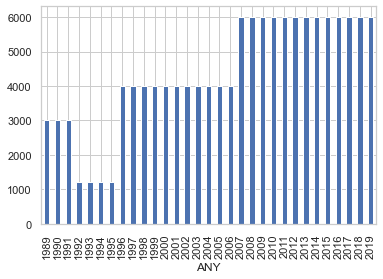

In [8]:
survey.groupby(['ANY']).size().plot.bar()

In [9]:
survey = survey.query('ANY >= 2007')

In [10]:
survey.shape

(78013, 285)

In [11]:
# Columns with NA values are being removed
# Reason: most of the columns are categorical and it is not easy nor efficient to replace those NAs with meaningful values 
survey.dropna(axis='columns', inplace=True)

In [12]:
survey.shape

(78013, 173)

# 1.2. Subsetting the DataFrame to only relevant columns (survey questions)

In [13]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [14]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor


In [15]:
questions.shape

(285, 5)

In [16]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [17]:
questions.shape

(67, 5)

In [18]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_1A4': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED',
 'VAL_GESTMUNI_1A2': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED',
 'VAL_ESCOMBRARIES_1A2': 'CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED',
 'VAL_NETEJA_1A2': 'CITY SERVICES - RATE: STREETS CLEANING - GROUPED',
 'VAL_

In [19]:
relevant_questions = list(questions.Nom_variable.unique())

In [20]:
# # Filtering the table by choosing only those questions which are relevant for further analysis
# survey = survey[relevant_questions]

In [21]:
# Some of the columns chosen a relevant for further analysis are not available due to NA values
for i in ['COST_ESPAI_1A14', 'VAL_BICING_1A2', 'HAB_CERT_DISC', 'HAB_TREBDOM', 'VAL_SPEIS_1A2', 'HAB_REGIM_1A5', 'PROB_LLAR_ECON_1A6', 'MUNI_VOTAR', 'US_ASSOCIA_BARRI', 'VAL_TRAM_1A2', 'VAL_SOROLL_1A2', 'COST_LLOGUER_1A14', 'VAL_CC_1A2', 'TE_CERT_DISCAP']:
    relevant_questions.remove(i)

In [22]:
survey = survey[relevant_questions]

In [23]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,HAB_COTXE_PART,HAB_M2_1A14,LLAR_INGRESSOS_1A10,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4
57800,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,MÉS DE 5 ANYS I FINS A 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,...,NO,FINS 50 M2,DE 1.501 A 2.000 EUROS,CLASSE MITJANA-MITJANA,MÉS ESPANYOL QUE CATALÀ,ESTRANGER,CASTELLÀ,SECUNDARIS PROFESSIONALS,PARELLA AMB FILLS,QUATRE O MÉS
57801,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 65 ANYS I MÉS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,HA MILLORAT,...,NO,DE 71 A 80 M2,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,OBLIGATORIS,PARELLA SOLA,DUES
57802,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 25 A 34 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,SEMPRE HA VISCUT AL BARRI,ESTÀ IGUAL,...,SÍ,NO HO SAP,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CASTELLÀ,UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS
57803,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,DONA,DE 45 A 54 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 2 ANYS I FINS A 5 ANYS,HA MILLORAT,...,SÍ,DE 61 A 70 M2,NO CONTESTA,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CASTELLÀ,SECUNDARIS PROFESSIONALS,PERSONA SOLA,UNA
57804,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,HOME,DE 35 A 44 ANYS,ALTRES UNIÓ EUROPEA,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA MILLORAT,...,SÍ,DE 51 A 60 M2,DE 1.001 A 1.500 EUROS,CLASSE MITJANA-MITJANA,TAN ESPANYOL COM CATALÀ,ESTRANGER,CASTELLÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES


In [24]:
# Reading responses dataset with a flag indicating if the response relates to the question
# which was tagged as relevant for further analysis or not
responses = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [25]:
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [26]:
responses.shape

(4529, 4)

In [27]:
responses = responses.query('Flag == 1')
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [28]:
responses.shape

(451, 4)

# 1.3. Translating the data from Catalan to English

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (*Preguntas*) and answers (*Respostes*). Below, I create a dictionary *translating_responses* with question name (*Nom_variable*) as a key and *temp_dict* as a value. *Temp_dict* is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.

In [29]:
translating_responses = {}
for i in responses.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = responses.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_responses[i] = temp_dict

In [30]:
survey['VAL_BUS_1A2'].unique()

array(['APROVAT (5 A 10)', 'SUSPÈS (0 A 4)', 'NS / NC'], dtype=object)

In [31]:
translating_responses['VAL_BUS_1A2']

{'nan': nan,
 'SUSPÈS (0 A 4)': 'BAD (0 TO 4)',
 'APROVAT (5 A 10)': 'GOOD (5 TO 10)',
 'NS / NC': "I DON'T KNOW / NO ANSWER"}

In [32]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_responses[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [33]:
survey['VAL_BUS_1A2'].unique()

array(['GOOD (5 TO 10)', 'BAD (0 TO 4)', "I DON'T KNOW / NO ANSWER"],
      dtype=object)

# 1.4. Subsetting the data to responses of people aged 65+ 
For further analysis we will use the data from 2008-2019 Surveys with responses of people aged 65 years and more. Data from 2008-2018 will be used for training the models and data from 2019 - for testing.

In [34]:
survey.shape

(78013, 53)

In [35]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      19582
FROM 18 TO 24 YEARS     5856
FROM 25 TO 34 YEARS    14092
FROM 35 TO 44 YEARS    15191
FROM 45 TO 54 YEARS    12730
FROM 55 TO 64 YEARS    10562
dtype: int64

In [36]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [37]:
survey_65.shape

(19582, 53)

In [38]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [39]:
survey_65.shape, data.shape

((19582, 53), (19582, 53))

# 1.5. Data preparation

## 1.5.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [40]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size()

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           201
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1818
I WOULD LIVE OUTSIDE BARCELONA                        2357
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         15184
NO ANSWER                                                4
OTHERS                                                  18
dtype: int64

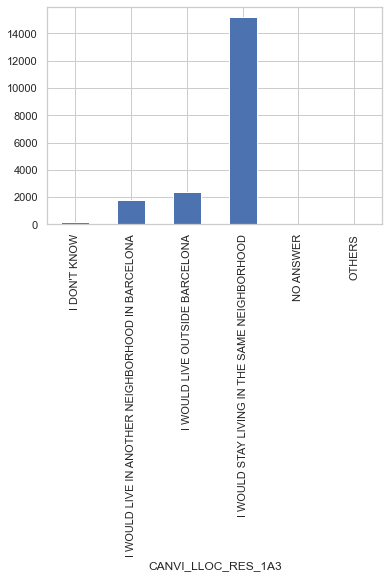

In [41]:
survey_65.groupby(['CANVI_LLOC_RES_1A3']).size().plot.bar()

In [42]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan,
             'OTHERS': np.nan
            }
data['Would_not_stay_in_the_neighborhood'] = [data_prep[i] for i in data['CANVI_LLOC_RES_1A3']]

In [43]:
count_stay = len(data[data['Would_not_stay_in_the_neighborhood']==0])
count_move = len(data[data['Would_not_stay_in_the_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')
pct_of_move = count_move/(count_stay + count_move)
print("Number of elderly who would hange their neighborhood or move out from the city:", count_move)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')

Number of elderly who would stay in their neighborhood: 15184
Percentage of elderly who would stay in their neighborhood: 89.31 %
Number of elderly who would hange their neighborhood or move out from the city: 1818
Percentage of elderly who would change their neighborhood or move out from the city: 10.69 %


## 1.4.2 Independent variables

First insight into the dataset using cross tabulation of dependent variable and different features:

In [44]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
ANY,,
2007,1161,117
2008,1185,123
2009,1172,117
2010,1168,140
2011,1131,145
2012,1149,146
2013,1204,154
2014,1195,130
2015,1225,144


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,990,221
EIXAMPLE,2566,199
GRÀCIA,1286,110
HORTA - GUINARDÓ,1738,229
LES CORTS,1342,65
NOU BARRIS,1528,270
SANT ANDREU,1223,185
SANT MARTÍ,1817,215
SANTS - MONTJUÏC,1314,260


Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,24,9
CAN BARÓ,87,19
CAN PEGUERA,20,5
CANYELLES,108,9
CIUTAT MERIDIANA,79,43
...,...,...
VALLBONA,9,6
VALLCARCA I ELS PENITENTS,194,21
"VALLVIDRERA, EL TIBIDABO I LES PLANES",35,2


Would_not_stay_in_the_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",353,78
EL BARRI GÒTIC,226,35
"EL BESÒS, EL MARESME I PROVENÇALS",304,51
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,461,31
EL CARMEL I CAN BARÓ,373,83
EL CLOT I EL CAMP DE L'ARPA,400,42
EL FORT PIENC,395,38
EL GUINARDÓ,413,55
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",289,34


Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,5894,678
WOMAN,9290,1140


Would_not_stay_in_the_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,15184,1818


Would_not_stay_in_the_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,114,8
REMAINING COUNTRIES,133,20
SPANISH,14937,1790


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,48,13
I DON'T KNOW,2,0
I HAVE ALWAYS LIVED IN THE CITY,6522,846
MORE THAN 10 YEARS,8427,934
MORE THAN 2 YEARS AND UP TO 5 YEARS,81,11
MORE THAN 5 YEARS AND UP TO 10 YEARS,102,14
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,149,43
I HAVE ALWAYS LIVED IN THE BARRI,2460,205
LESS THAN SIX MONTHS,42,11
MORE THAN 10 YEARS,11981,1404
MORE THAN 2 YEARS AND UP TO 5 YEARS,210,71
MORE THAN 5 YEARS AND UP TO 10 YEARS,340,84
NO ANSWER,2,0


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,357,33
IT HAS IMPROVED,5279,503
IT'S THE SAME,4120,416
IT'S WORSE,5419,865
NO ANSWER,9,1


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1987,244
IT WILL IMPROVE,8009,819
IT WILL STAY THE SAME,1795,221
IT WILL WORSE,3382,532
NO ANSWER,11,2


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),1351,259
I DON'T KNOW / NO ANSWER,79,15
LITTLE / NOT SATISFIED (0 TO 4),280,73
SATISFIED (7 TO 8),6396,785
VERY SATISFIED (9 TO 10),7078,686


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTMUNI_1A2,,
BAD (0 TO 4),2317,375
GOOD (5 TO 10),12248,1382
I DON'T KNOW / NO ANSWER,619,61


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),806,146
GOOD (5 TO 10),14315,1664
I DON'T KNOW / NO ANSWER,63,8


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),2353,388
GOOD (5 TO 10),12795,1427
I DON'T KNOW / NO ANSWER,36,3


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),2248,407
GOOD (5 TO 10),12234,1344
I DON'T KNOW / NO ANSWER,702,67


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),1237,224
GOOD (5 TO 10),13713,1561
I DON'T KNOW / NO ANSWER,234,33


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1495,279
GOOD (5 TO 10),12198,1355
I DON'T KNOW / NO ANSWER,1491,184


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2771,434
GOOD (5 TO 10),12224,1361
I DON'T KNOW / NO ANSWER,189,23


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1456,270
GOOD (5 TO 10),12881,1453
I DON'T KNOW / NO ANSWER,847,95


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),4999,683
GOOD (5 TO 10),9435,1049
I DON'T KNOW / NO ANSWER,750,86


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),8527,1109
GOOD (5 TO 10),4479,464
I DON'T KNOW / NO ANSWER,2178,245


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),1275,247
GOOD (5 TO 10),13105,1513
I DON'T KNOW / NO ANSWER,804,58


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),410,74
GOOD (5 TO 10),12908,1565
I DON'T KNOW / NO ANSWER,1866,179


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),2582,404
GOOD (5 TO 10),10918,1215
I DON'T KNOW / NO ANSWER,1684,199


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),4925,712
GOOD (5 TO 10),9613,1022
I DON'T KNOW / NO ANSWER,646,84


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),4091,734
GOOD (5 TO 10),10931,1059
I DON'T KNOW / NO ANSWER,162,25


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),1244,243
GOOD (5 TO 10),7914,952
I DON'T KNOW / NO ANSWER,6026,623


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),840,156
GOOD (5 TO 10),10360,1230
I DON'T KNOW / NO ANSWER,3984,432


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),1078,203
GOOD (5 TO 10),8259,933
I DON'T KNOW / NO ANSWER,5847,682


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),523,113
GOOD (5 TO 10),10198,1150
I DON'T KNOW / NO ANSWER,4463,555


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),887,173
GOOD (5 TO 10),10910,1193
I DON'T KNOW / NO ANSWER,3387,452


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),858,147
GOOD (5 TO 10),12831,1530
I DON'T KNOW / NO ANSWER,1495,141


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),284,52
GOOD (5 TO 10),9289,1163
I DON'T KNOW / NO ANSWER,5611,603


Would_not_stay_in_the_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,35,6
BICYCLE (BICING),12,5
BUS,6681,865
CAR,728,80
METRO / CATALAN RAILWAYS (FGC) URBAN,4631,579
MOTORCYCLE,105,14
NO ANSWER,12,0
OTHERS,45,4
TAXI,531,45


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,297,38
LITTLE / NOTHING EQUIPPED,1152,193
NORMAL,1555,203
VERY / FAIRLY GIFTED,12180,1384


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,129,12
LITTLE / NOTHING EQUIPPED,1618,307
NORMAL,1473,229
VERY / FAIRLY GIFTED,11964,1270


Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,116,24
IT HAS IMPROVED,8063,745
IT'S THE SAME,4498,464
IT'S WORSE,2501,585
NO ANSWER,6,0


Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1752,233
IT WILL GET WORSE,1814,475
IT WILL IMPROVE,8723,791
IT WILL STAY THE SAME,2888,319
NO ANSWER,7,0


Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),1031,398
I DON'T KNOW / NO ANSWER,44,15
LITTLE / NOT SATISFIED (0 TO 4),125,203
SATISFIED (7 TO 8),6932,837
VERY SATISFIED (9 TO 10),7052,365


Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,306,46
"NEITHER THE BEST, NOR THE WORST",5424,1080
NO ANSWER,4,2
ONE OF THE BEST,9162,395
ONE OF THE WORST,288,295


Would_not_stay_in_the_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1818
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,15184,0


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GESTBARRI_1A2,,
BAD (0 TO 4),1392,337
GOOD (5 TO 10),12715,1321
I DON'T KNOW / NO ANSWER,1077,160


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,7127,769
NO ANSWER,100,16
YES,6955,865


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,915,73
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,540,39
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2875,329
"FROM 1,501 TO 2,000 EUROS",1602,223
"FROM 2,001 TO 2,500 EUROS",846,100
"FROM 2,501 TO 3,000 EUROS",475,61
"FROM 3,001 TO 5,000 EUROS",575,56
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",3629,462
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,1098,102


Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,60,3
I DON'T KNOW,388,31
LOW CLASS,1416,239
MIDDLE-HIGH CLASS,685,66
MIDDLE-LOW CLASS,4749,665
MIDDLE-MIDDLE CLASS,7709,792
NO ANSWER,177,22


Would_not_stay_in_the_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",5796,668
I DON'T KNOW,109,12
MORE CATALAN THAN SPANISH,3773,452
MORE SPANISH THAN CATALAN,954,132
NO ANSWER,203,20
ONLY CATALAN,2878,348
ONLY SPANISH,1194,145
OTHER,277,41


Would_not_stay_in_the_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,6784,883
FOREIGN,606,84
NO ANSWER,10,1
REST OF CATALONIA,1864,180
REST OF SPAIN,5920,670


Would_not_stay_in_the_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,8019,920
NO ANSWER,14,1
OTHER,82,17
SPANISH,7069,880


Would_not_stay_in_the_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,1927,215
GENERAL SECONDARY,2051,268
MANDATORY,6667,767
NO ANSWER,55,10
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1960,257
UNIVERSITY,2428,290


Would_not_stay_in_the_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1553,204
COUPLE WITH NO CHILDREN,6679,794
NO ANSWER,1,0
OTHER FAMILY,641,74
OTHER SITUATIONS,211,16
SINGLE,4546,558
SINGLE-PARENT WITH CHILDREN,1553,172


Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,726,88
ONE,4546,558
THREE,1773,194
TWO,8139,978


Would_not_stay_in_the_neighborhood,0.0,1.0
Would_not_stay_in_the_neighborhood,,
0.0,15184,0
1.0,0,1818


Some of the features will be used only for statistical description of the sample. Some will be used as independent variables in further modeling. Others will be ignored/dropped.

General information about respondends:
```
ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
SENTPERTI : BELONGING - SPANISH VS CATALAN
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?
```

About city and neighborhood:
```
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_1A4 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
SATISF_RES_BARRI_1A4 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
VAL_GESTMUNI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL? - GROUPED
VAL_GESTBARRI_1A2 : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD? - GROUPED
COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
```

About city services:
```
VAL_ESCOMBRARIES_1A2 : CITY SERVICES - RATE: GARBAGE COLLECTION - GROUPED
VAL_NETEJA_1A2 : CITY SERVICES - RATE: STREETS CLEANING - GROUPED
VAL_VERD_1A2 : CITY SERVICES - RATE: GREEN AREAS - GROUPED
VAL_ENLLUM_1A2 : CITY SERVICES - RATE: PUBLIC LIGHTING - GROUPED
VAL_URBA_1A2 : CITY SERVICES - RATE: URBANISM - GROUPED
VAL_ASFALT_1A2 : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION - GROUPED
VAL_FACANES_1A2 : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION - GROUPED
VAL_CIRCUL_1A2 : CITY SERVICES - RATE: CIRCULATION - GROUPED
VAL_APARCA_1A2 : CITY SERVICES - RATE: PARKING - GROUPED
VAL_BUS_1A2 : CITY SERVICES - RATE: BUS - GROUPED
VAL_METRO_1A2 : CITY SERVICES - RATE: SUBWAY - GROUPED
VAL_GUB_1A2 : CITY SERVICES - RATE: MUNICIPAL POLICE - GROUPED
VAL_SEGUR_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE - GROUPED
VAL_SEGUR_BARRI_1A2 : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD - GROUPED
VAL_ESPORT_1A2 : CITY SERVICES - RATE: SPORTS FACILITIES - GROUPED
VAL_SIAC_1A2 : CITY SERVICES - RATE: CITIZEN INFORMATION AND ATTENTION SERVICES - GROUPED
VAL_CSS_1A2 : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS - GROUPED
VAL_CULT_1A2 : CITY SERVICES - RATE: CULTURAL ACTIVITIES - GROUPED
VAL_FESTESPOP_1A2 : CITY SERVICES - RATE: POPULAR FESTIVALS - GROUPED
VAL_MERCAT_1A2 : CITY SERVICES - RATE: MUNICIPAL MARKETS - GROUPED
VAL_BIBLIO_1A2 : CITY SERVICES - RATE: PUBLIC LIBRARIES - GROUPED
```

About transport:
```
TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
VAL_TRANSP_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
VAL_TRANSP_BARRI_1A3 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
```


Dependent variable - willingness to change residence:
```
CANVI_LLOC_RES_1A3 : IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?
```


About living conditions:
```
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
```

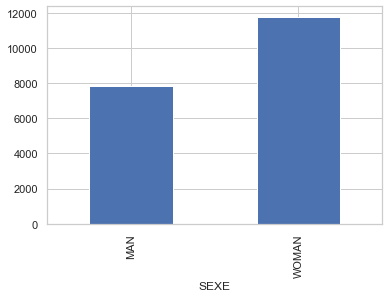

In [45]:
# GENDER
survey_65.groupby(['SEXE']).size().plot.bar()

In [46]:
display(pd.crosstab(data.SEXE, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SEXE,,
MAN,5894,678
WOMAN,9290,1140


In [47]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data['SEXE']]

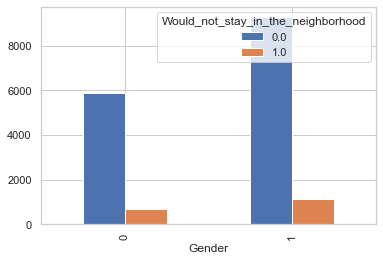

In [48]:
table = pd.crosstab(data.Gender, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

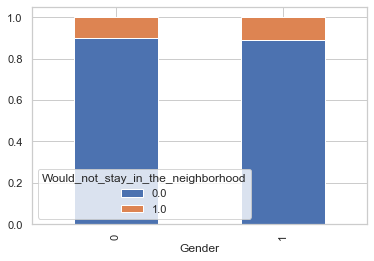

In [49]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

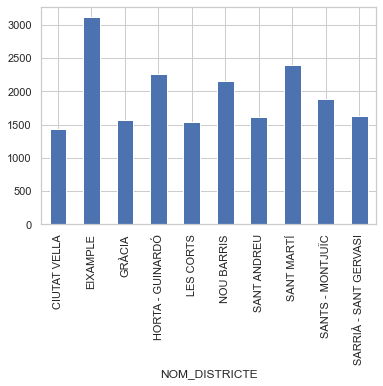

In [50]:
# DISTRICT
survey_65.groupby(['NOM_DISTRICTE']).size().plot.bar()

In [51]:
display(pd.crosstab(data.NOM_DISTRICTE , data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,990,221
EIXAMPLE,2566,199
GRÀCIA,1286,110
HORTA - GUINARDÓ,1738,229
LES CORTS,1342,65
NOU BARRIS,1528,270
SANT ANDREU,1223,185
SANT MARTÍ,1817,215
SANTS - MONTJUÏC,1314,260


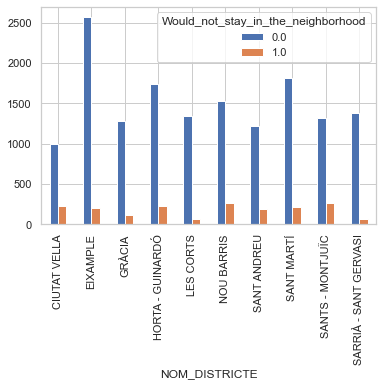

In [52]:
table = pd.crosstab(data.NOM_DISTRICTE, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

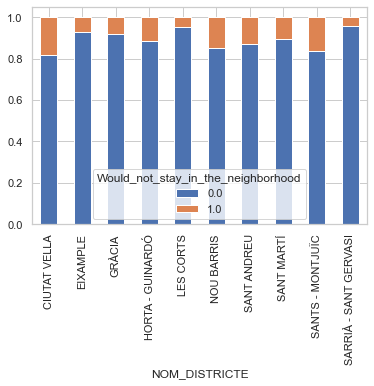

In [53]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

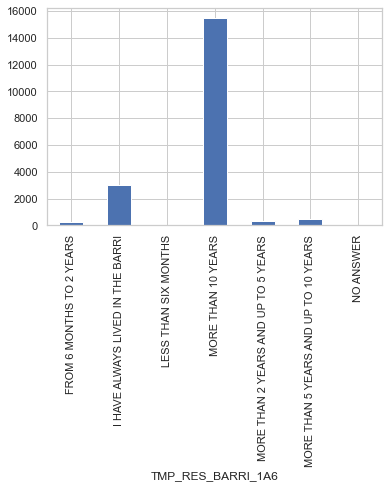

In [54]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
survey_65.groupby(['TMP_RES_BARRI_1A6']).size().plot.bar()

In [55]:
display(pd.crosstab(data.TMP_RES_BARRI_1A6, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,149,43
I HAVE ALWAYS LIVED IN THE BARRI,2460,205
LESS THAN SIX MONTHS,42,11
MORE THAN 10 YEARS,11981,1404
MORE THAN 2 YEARS AND UP TO 5 YEARS,210,71
MORE THAN 5 YEARS AND UP TO 10 YEARS,340,84
NO ANSWER,2,0


In [56]:
data.TMP_RES_BARRI_1A6.unique()

array(['I HAVE ALWAYS LIVED IN THE BARRI', 'MORE THAN 10 YEARS',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'FROM 6 MONTHS TO 2 YEARS',
       'LESS THAN SIX MONTHS', 'NO ANSWER'], dtype=object)

In [57]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE CITY',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS',
             'NO ANSWER': np.nan}
data['Time_living_in_barri'] = [data_prep[i] for i in data['TMP_RES_BARRI_1A6']]

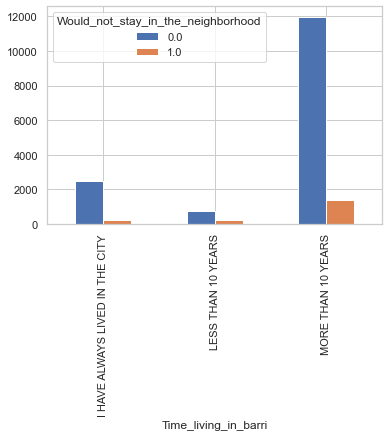

In [58]:
table = pd.crosstab(data.Time_living_in_barri, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

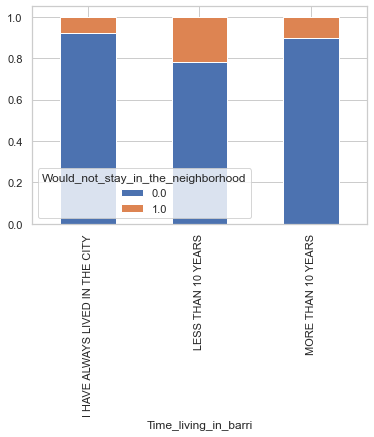

In [59]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

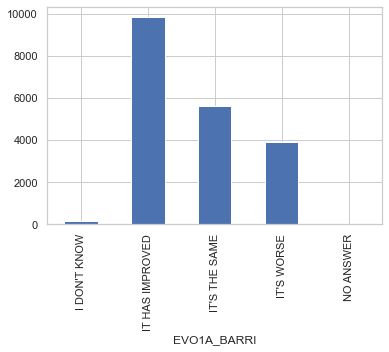

In [60]:
# IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
survey_65.groupby(['EVO1A_BARRI']).size().plot.bar()

In [61]:
display(pd.crosstab(data.EVO1A_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,116,24
IT HAS IMPROVED,8063,745
IT'S THE SAME,4498,464
IT'S WORSE,2501,585
NO ANSWER,6,0


In [62]:
data.EVO1A_BARRI.unique()

array(['IT HAS IMPROVED', "IT'S THE SAME", "IT'S WORSE", "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [63]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data['EVO1A_BARRI']]

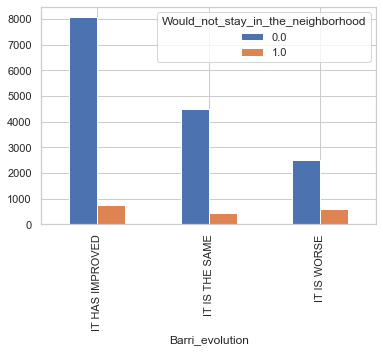

In [64]:
table = pd.crosstab(data.Barri_evolution, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

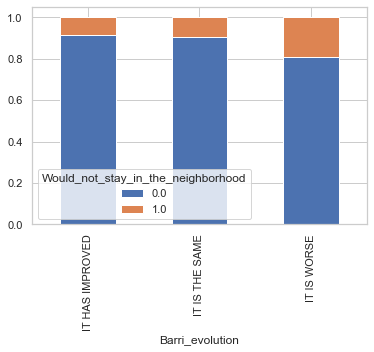

In [65]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [66]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "IT IS THE SAME"
data_prep2 = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['Barri_evolution2'] = [data_prep2[i] for i in data['EVO1A_BARRI']]

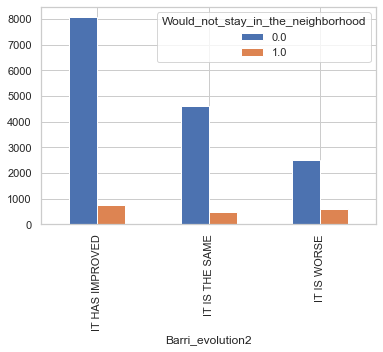

In [67]:
table = pd.crosstab(data.Barri_evolution2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

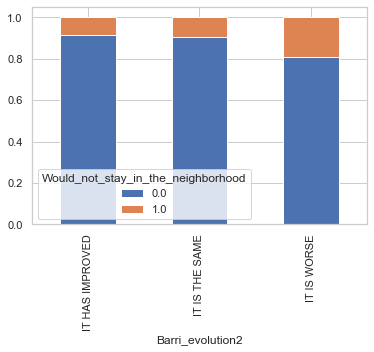

In [68]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

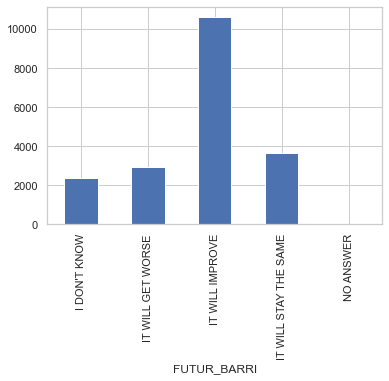

In [69]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BARRI']).size().plot.bar()

In [70]:
display(pd.crosstab(data.FUTUR_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1752,233
IT WILL GET WORSE,1814,475
IT WILL IMPROVE,8723,791
IT WILL STAY THE SAME,2888,319
NO ANSWER,7,0


In [71]:
data.FUTUR_BARRI.unique()

array(['IT WILL IMPROVE', "I DON'T KNOW", 'IT WILL STAY THE SAME',
       'IT WILL GET WORSE', 'NO ANSWER'], dtype=object)

In [72]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data['FUTUR_BARRI']]

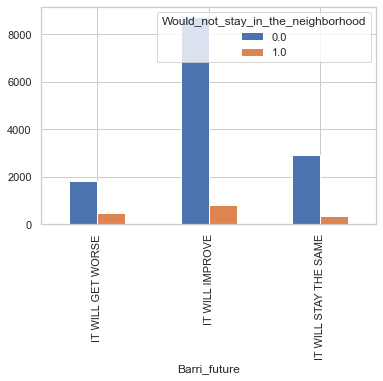

In [73]:
table = pd.crosstab(data.Barri_future, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

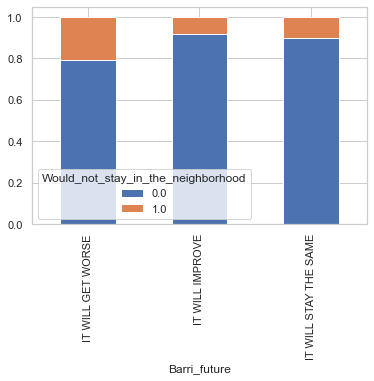

In [74]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [75]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "IT IS THE SAME"
data_prep2 = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['Barri_future2'] = [data_prep2[i] for i in data['FUTUR_BARRI']]

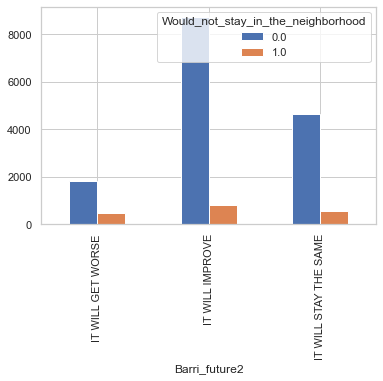

In [76]:
table = pd.crosstab(data.Barri_future2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

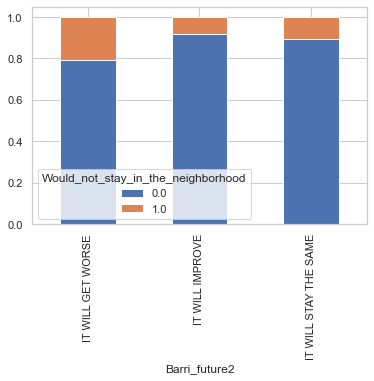

In [77]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

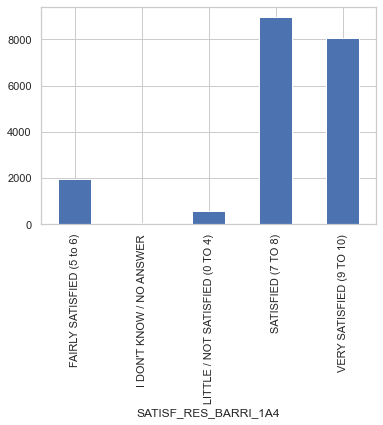

In [78]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
survey_65.groupby(['SATISF_RES_BARRI_1A4']).size().plot.bar()

In [79]:
display(pd.crosstab(data.SATISF_RES_BARRI_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BARRI_1A4,,
FAIRLY SATISFIED (5 to 6),1031,398
I DON'T KNOW / NO ANSWER,44,15
LITTLE / NOT SATISFIED (0 TO 4),125,203
SATISFIED (7 TO 8),6932,837
VERY SATISFIED (9 TO 10),7052,365


In [80]:
data.SATISF_RES_BARRI_1A4.unique()

array(['VERY SATISFIED (9 TO 10)', 'FAIRLY SATISFIED (5 to 6)',
       'SATISFIED (7 TO 8)', "I DON'T KNOW / NO ANSWER",
       'LITTLE / NOT SATISFIED (0 TO 4)'], dtype=object)

In [81]:
data_prep = {'SATISFIED (7 TO 8)': 'SATISFIED', 
             'VERY SATISFIED (9 TO 10)': 'SATISFIED',
             'FAIRLY SATISFIED (5 to 6)': 'NOT SATISFIED', 
             'LITTLE / NOT SATISFIED (0 TO 4)': 'NOT SATISFIED',
             "I DON'T KNOW / NO ANSWER": np.nan}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BARRI_1A4']]

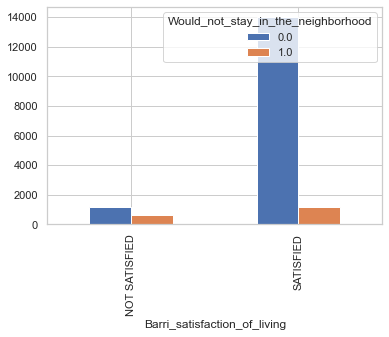

In [82]:
table = pd.crosstab(data.Barri_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

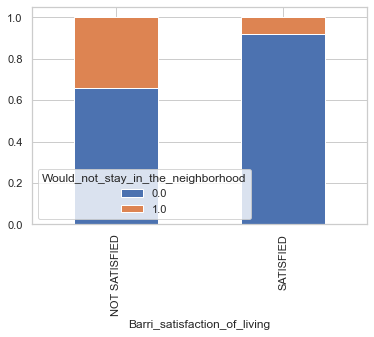

In [83]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

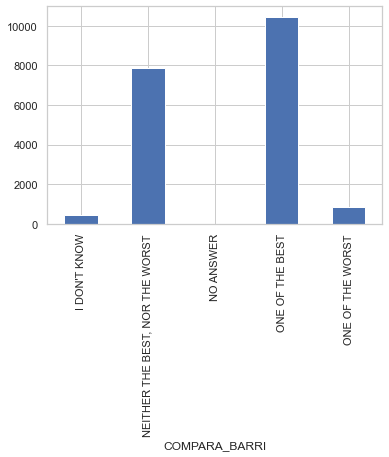

In [84]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
survey_65.groupby(['COMPARA_BARRI']).size().plot.bar()

In [85]:
display(pd.crosstab(data.COMPARA_BARRI, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,306,46
"NEITHER THE BEST, NOR THE WORST",5424,1080
NO ANSWER,4,2
ONE OF THE BEST,9162,395
ONE OF THE WORST,288,295


In [86]:
data.COMPARA_BARRI.unique()

array(['NEITHER THE BEST, NOR THE WORST', 'ONE OF THE WORST',
       'ONE OF THE BEST', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [87]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data['COMPARA_BARRI']]

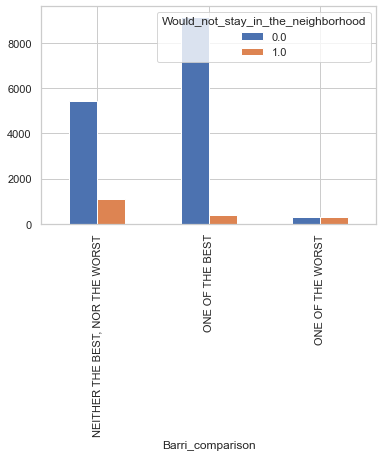

In [88]:
table = pd.crosstab(data.Barri_comparison, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

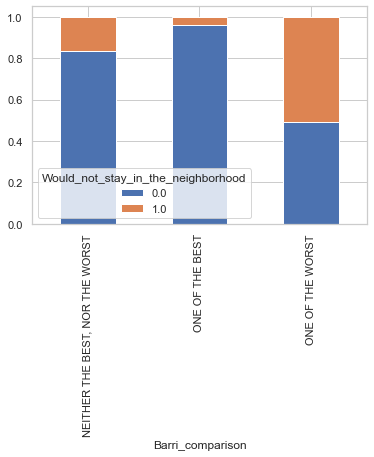

In [89]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [90]:
# Replacing "I DON'T KNOW" answer with the 'neutral' response "NEITHER THE BEST, NOR THE WORST"
data_prep2 = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": 'NEITHER THE BEST, NOR THE WORST', 
             'NO ANSWER': np.nan}
data['Barri_comparison2'] = [data_prep2[i] for i in data['COMPARA_BARRI']]

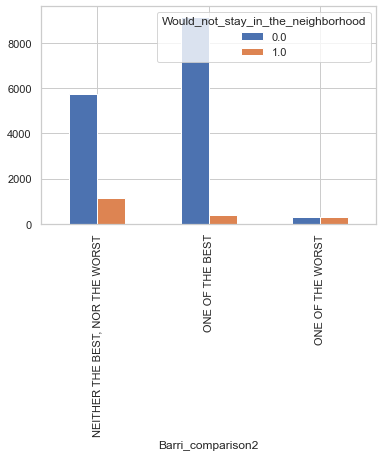

In [91]:
table = pd.crosstab(data.Barri_comparison2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

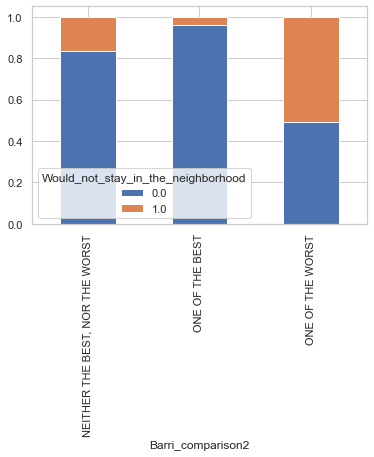

In [92]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [93]:
survey_65.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'TRANSP_MOU',
 'VAL_TRANSP_1A3',
 'VAL_TRANSP_BARRI_1A3',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_1A4',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI_1A2',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4']

In [94]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2', 'VAL_URBA_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_APARCA_1A2', 'VAL_BUS_1A2',
          'VAL_METRO_1A2', 'VAL_GUB_1A2', 'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_ESPORT_1A2', 'VAL_SIAC_1A2',
          'VAL_CSS_1A2', 'VAL_CULT_1A2', 'VAL_FESTESPOP_1A2', 'VAL_MERCAT_1A2', 'VAL_BIBLIO_1A2']:
    display(pd.crosstab(data[x], data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESCOMBRARIES_1A2,,
BAD (0 TO 4),806,146
GOOD (5 TO 10),14315,1664
I DON'T KNOW / NO ANSWER,63,8


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_NETEJA_1A2,,
BAD (0 TO 4),2353,388
GOOD (5 TO 10),12795,1427
I DON'T KNOW / NO ANSWER,36,3


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_VERD_1A2,,
BAD (0 TO 4),2248,407
GOOD (5 TO 10),12234,1344
I DON'T KNOW / NO ANSWER,702,67


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ENLLUM_1A2,,
BAD (0 TO 4),1237,224
GOOD (5 TO 10),13713,1561
I DON'T KNOW / NO ANSWER,234,33


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_URBA_1A2,,
BAD (0 TO 4),1495,279
GOOD (5 TO 10),12198,1355
I DON'T KNOW / NO ANSWER,1491,184


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ASFALT_1A2,,
BAD (0 TO 4),2771,434
GOOD (5 TO 10),12224,1361
I DON'T KNOW / NO ANSWER,189,23


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FACANES_1A2,,
BAD (0 TO 4),1456,270
GOOD (5 TO 10),12881,1453
I DON'T KNOW / NO ANSWER,847,95


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CIRCUL_1A2,,
BAD (0 TO 4),4999,683
GOOD (5 TO 10),9435,1049
I DON'T KNOW / NO ANSWER,750,86


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_APARCA_1A2,,
BAD (0 TO 4),8527,1109
GOOD (5 TO 10),4479,464
I DON'T KNOW / NO ANSWER,2178,245


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BUS_1A2,,
BAD (0 TO 4),1275,247
GOOD (5 TO 10),13105,1513
I DON'T KNOW / NO ANSWER,804,58


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_METRO_1A2,,
BAD (0 TO 4),410,74
GOOD (5 TO 10),12908,1565
I DON'T KNOW / NO ANSWER,1866,179


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_GUB_1A2,,
BAD (0 TO 4),2582,404
GOOD (5 TO 10),10918,1215
I DON'T KNOW / NO ANSWER,1684,199


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_1A2,,
BAD (0 TO 4),4925,712
GOOD (5 TO 10),9613,1022
I DON'T KNOW / NO ANSWER,646,84


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SEGUR_BARRI_1A2,,
BAD (0 TO 4),4091,734
GOOD (5 TO 10),10931,1059
I DON'T KNOW / NO ANSWER,162,25


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_ESPORT_1A2,,
BAD (0 TO 4),1244,243
GOOD (5 TO 10),7914,952
I DON'T KNOW / NO ANSWER,6026,623


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_SIAC_1A2,,
BAD (0 TO 4),840,156
GOOD (5 TO 10),10360,1230
I DON'T KNOW / NO ANSWER,3984,432


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CSS_1A2,,
BAD (0 TO 4),1078,203
GOOD (5 TO 10),8259,933
I DON'T KNOW / NO ANSWER,5847,682


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_CULT_1A2,,
BAD (0 TO 4),523,113
GOOD (5 TO 10),10198,1150
I DON'T KNOW / NO ANSWER,4463,555


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_FESTESPOP_1A2,,
BAD (0 TO 4),887,173
GOOD (5 TO 10),10910,1193
I DON'T KNOW / NO ANSWER,3387,452


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_MERCAT_1A2,,
BAD (0 TO 4),858,147
GOOD (5 TO 10),12831,1530
I DON'T KNOW / NO ANSWER,1495,141


Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_BIBLIO_1A2,,
BAD (0 TO 4),284,52
GOOD (5 TO 10),9289,1163
I DON'T KNOW / NO ANSWER,5611,603


VAL_URBA_1A2, VAL_APARCA_1A2, VAL_METRO_1A2, VAL_GUB_1A2, VAL_ESPORT_1A2, VAL_SIAC_1A2, VAL_CSS_1A2, VAL_CULT_1A2, VAL_FESTESPOP_1A2, VAL_BIBLIO_1A2 - too many I DON'T KNOW / NO ANSWER values. Those columns/variables will be removed as they introducetoo many "I DON'T KNOW / NO ANSWER" responses.

In [95]:
data_prep = {'GOOD (5 TO 10)': 'GOOD', 
             'BAD (0 TO 4)': 'BAD',
            "I DON'T KNOW / NO ANSWER": np.nan}
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_BUS_1A2',
          'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    data[questions_dict[x][22:][:-10]] = [data_prep[i] for i in data[x]]

C:\Users\THINK\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


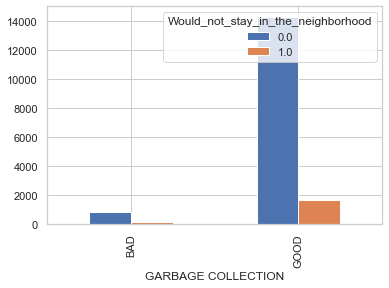

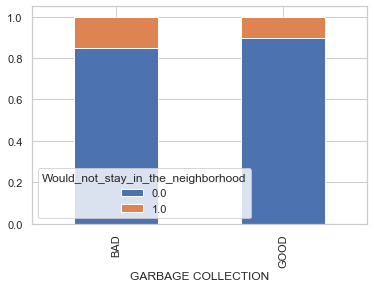

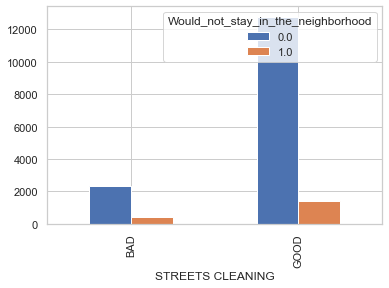

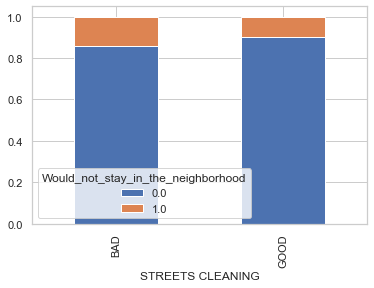

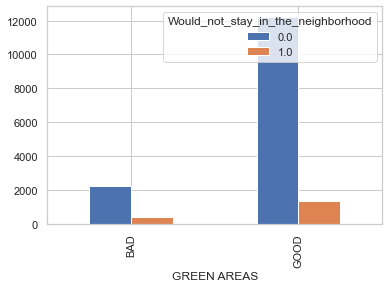

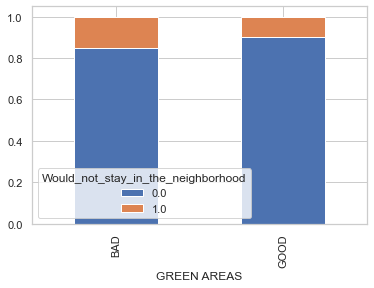

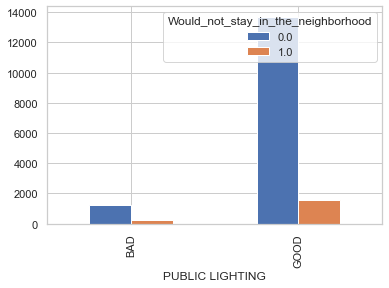

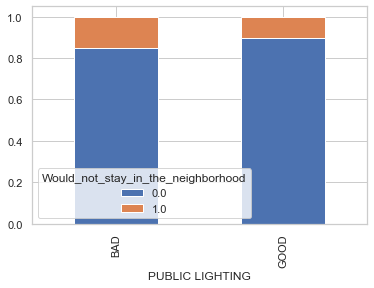

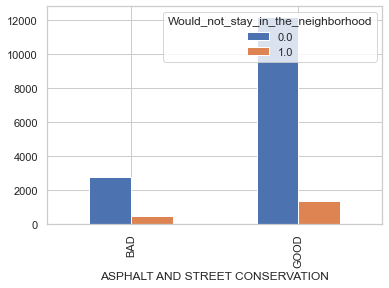

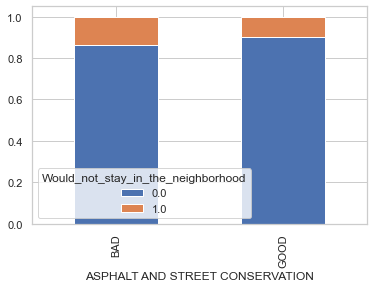

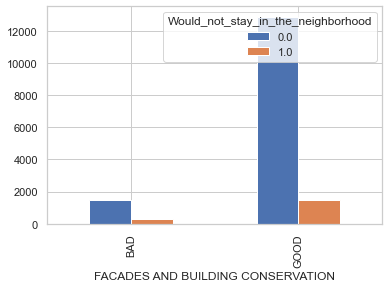

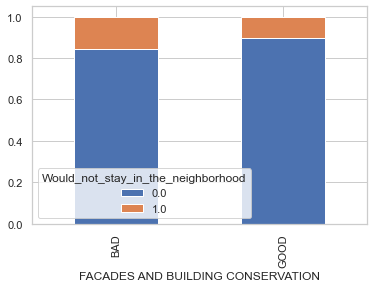

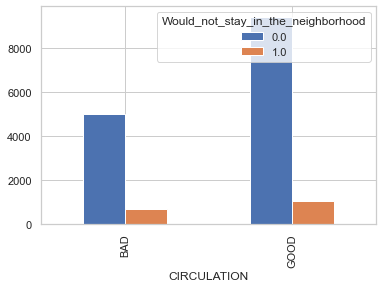

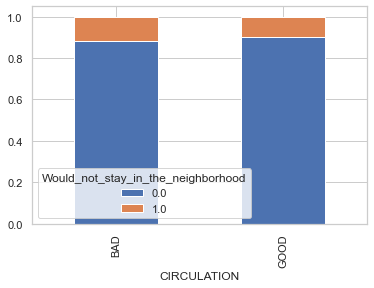

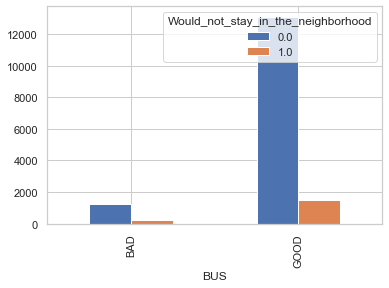

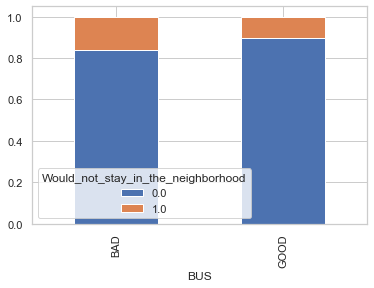

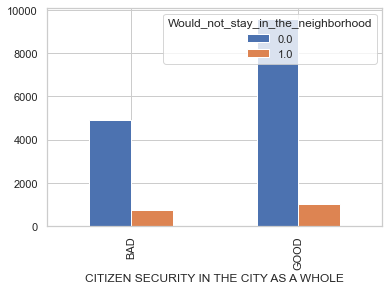

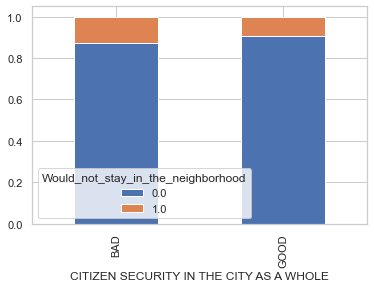

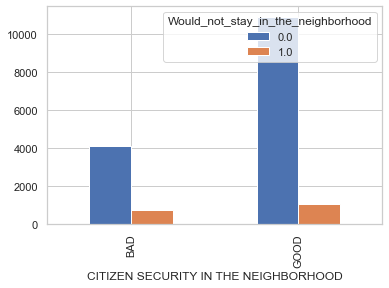

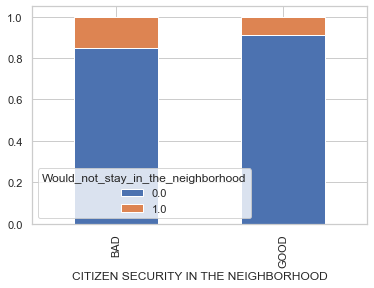

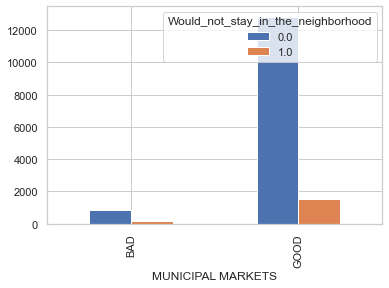

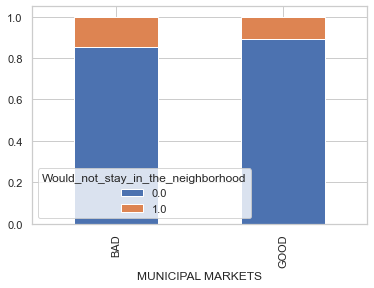

In [96]:
for x in ['VAL_ESCOMBRARIES_1A2', 'VAL_NETEJA_1A2', 'VAL_VERD_1A2', 'VAL_ENLLUM_1A2',
          'VAL_ASFALT_1A2', 'VAL_FACANES_1A2', 'VAL_CIRCUL_1A2', 'VAL_BUS_1A2',
          'VAL_SEGUR_1A2', 'VAL_SEGUR_BARRI_1A2', 'VAL_MERCAT_1A2']:
    table = pd.crosstab(data[questions_dict[x][22:][:-10]], data.Would_not_stay_in_the_neighborhood)
    table.plot(kind='bar')
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

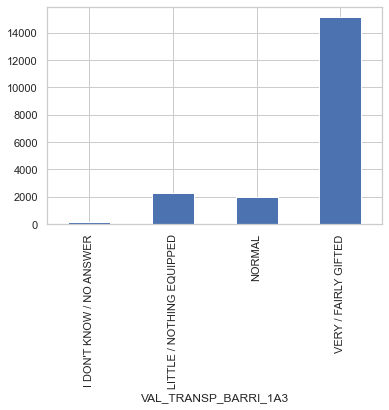

In [97]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_BARRI_1A3']).size().plot.bar()

In [98]:
display(pd.crosstab(data.VAL_TRANSP_BARRI_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A3,,
I DON'T KNOW / NO ANSWER,129,12
LITTLE / NOTHING EQUIPPED,1618,307
NORMAL,1473,229
VERY / FAIRLY GIFTED,11964,1270


In [99]:
data.VAL_TRANSP_BARRI_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', 'LITTLE / NOTHING EQUIPPED',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [100]:
data_prep = {'VERY / FAIRLY GIFTED': "GOOD", 
             'NORMAL': "NORMAL", 
             'LITTLE / NOTHING EQUIPPED': "BAD",
             "I DON'T KNOW / NO ANSWER": np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A3']]

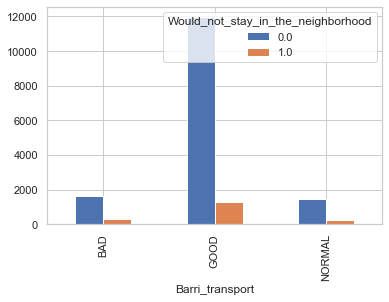

In [101]:
table = pd.crosstab(data.Barri_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

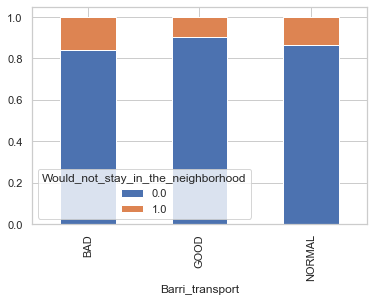

In [102]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

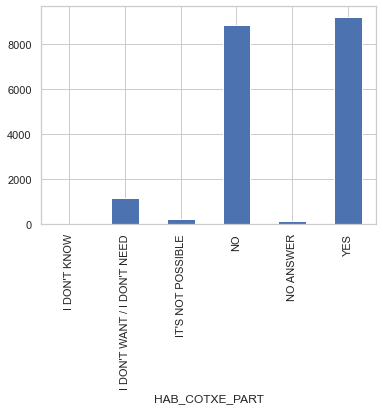

In [103]:
# DO YOU HAVE: PRIVATE CAR
survey_65.groupby(['HAB_COTXE_PART']).size().plot.bar()

In [104]:
display(pd.crosstab(data.HAB_COTXE_PART, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,7127,769
NO ANSWER,100,16
YES,6955,865


In [105]:
data.HAB_COTXE_PART.unique()

array(['NO', 'YES', 'NO ANSWER', "I DON'T KNOW",
       "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"], dtype=object)

In [106]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': np.nan, 
             "I DON'T KNOW": np.nan,
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data['HAB_COTXE_PART']]

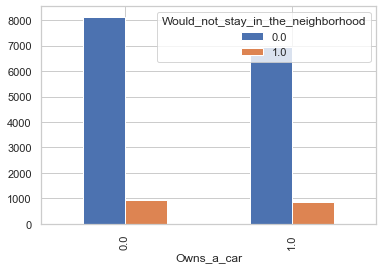

In [107]:
table = pd.crosstab(data.Owns_a_car, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

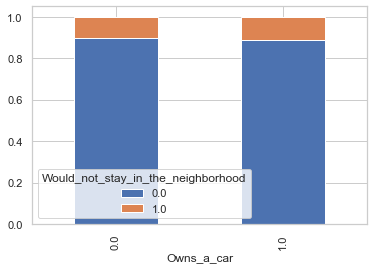

In [108]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

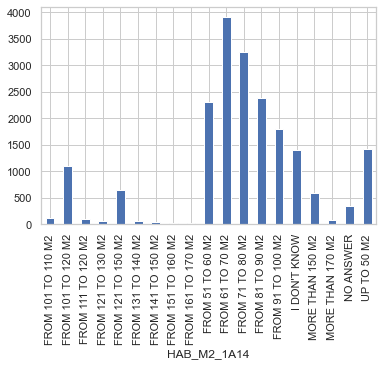

In [109]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
survey_65.groupby(['HAB_M2_1A14']).size().plot.bar()

In [110]:
display(pd.crosstab(data.HAB_M2_1A14, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,915,73
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,540,39
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


In [111]:
data.HAB_M2_1A14.unique()

array(['FROM 71 TO 80 M2', "I DON'T KNOW", 'FROM 91 TO 100 M2',
       'FROM 51 TO 60 M2', 'NO ANSWER', 'UP TO 50 M2', 'FROM 61 TO 70 M2',
       'FROM 101 TO 120 M2', 'FROM 81 TO 90 M2', 'FROM 121 TO 150 M2',
       'MORE THAN 150 M2', 'FROM 101 TO 110 M2', 'MORE THAN 170 M2',
       'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2', 'FROM 141 TO 150 M2',
       'FROM 131 TO 140 M2', 'FROM 161 TO 170 M2', 'FROM 151 TO 160 M2'],
      dtype=object)

In [112]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan, #'51-100 M2', # inserting most common value
             "I DON'T KNOW": np.nan } #'51-100 M2'} # inserting most common value
data['House_size'] = [data_prep[i] for i in data['HAB_M2_1A14']]

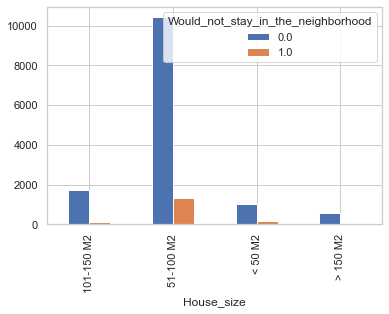

In [113]:
table = pd.crosstab(data.House_size, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

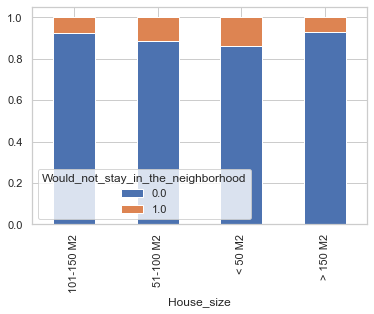

In [114]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [115]:
# Replacing "I DON'T KNOW" answer with the most common response '51-100 M2'
data_prep2 = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": '51-100 M2'} # inserting most common value
data['House_size2'] = [data_prep2[i] for i in data['HAB_M2_1A14']]

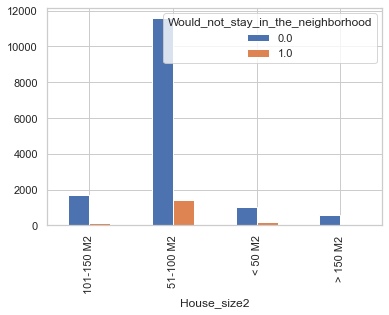

In [116]:
table = pd.crosstab(data.House_size2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

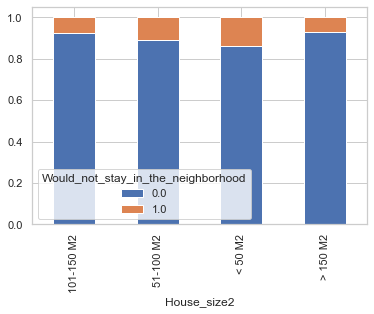

In [117]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

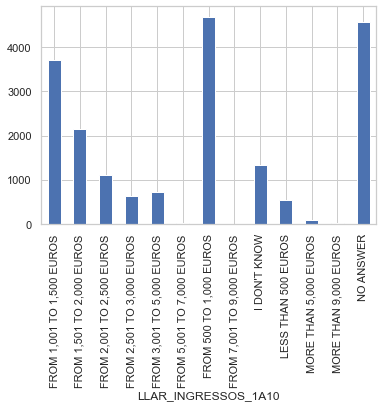

In [118]:
# WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
survey_65.groupby(['LLAR_INGRESSOS_1A10']).size().plot.bar()

In [119]:
display(pd.crosstab(data.LLAR_INGRESSOS_1A10, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2875,329
"FROM 1,501 TO 2,000 EUROS",1602,223
"FROM 2,001 TO 2,500 EUROS",846,100
"FROM 2,501 TO 3,000 EUROS",475,61
"FROM 3,001 TO 5,000 EUROS",575,56
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",3629,462
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,1098,102


In [120]:
data.LLAR_INGRESSOS_1A10.unique()

array(['FROM 1,001 TO 1,500 EUROS', 'NO ANSWER',
       'FROM 500 TO 1,000 EUROS', "I DON'T KNOW", 'LESS THAN 500 EUROS',
       'FROM 1,501 TO 2,000 EUROS', 'FROM 2,001 TO 2,500 EUROS',
       'FROM 3,001 TO 5,000 EUROS', 'FROM 2,501 TO 3,000 EUROS',
       'MORE THAN 5,000 EUROS', 'FROM 5,001 TO 7,000 EUROS',
       'FROM 7,001 TO 9,000 EUROS', 'MORE THAN 9,000 EUROS'], dtype=object)

In [121]:
data_prep = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 5,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": np.nan             
             } 
data['Monthly_family_income'] = [data_prep[i] for i in data['LLAR_INGRESSOS_1A10']]

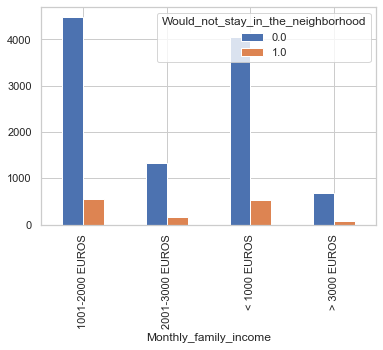

In [122]:
table = pd.crosstab(data.Monthly_family_income, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

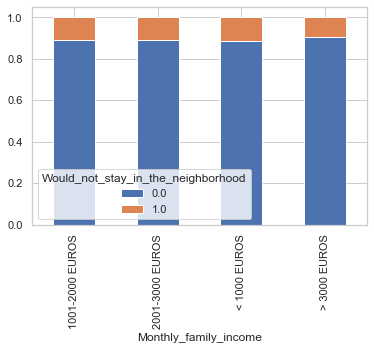

In [123]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [124]:
# Replacing "I DON'T KNOW" asnwer with the most common reponse '< 1000 EUROS'
data_prep2 = {'LESS THAN 500 EUROS': '< 1000 EUROS',
             'FROM 500 TO 1,000 EUROS': '< 1000 EUROS',
             'FROM 1,001 TO 1,500 EUROS': '1001-2000 EUROS',
             'FROM 1,501 TO 2,000 EUROS': '1001-2000 EUROS', 
             'FROM 2,001 TO 2,500 EUROS': '2001-3000 EUROS',
             'FROM 2,501 TO 3,000 EUROS': '2001-3000 EUROS',
             'FROM 3,001 TO 5,000 EUROS': '> 3000 EUROS', 
             'FROM 5,001 TO 7,000 EUROS': '> 3000 EUROS', 
             'FROM 7,001 TO 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 9,000 EUROS': '> 3000 EUROS',
             'MORE THAN 5,000 EUROS': '> 3000 EUROS',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": '< 1000 EUROS'  # inserting most common value           
             } 
data['Monthly_family_income2'] = [data_prep2[i] for i in data['LLAR_INGRESSOS_1A10']]

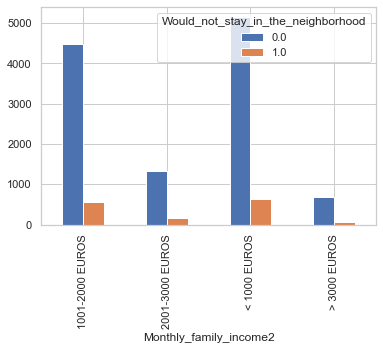

In [125]:
table = pd.crosstab(data.Monthly_family_income2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

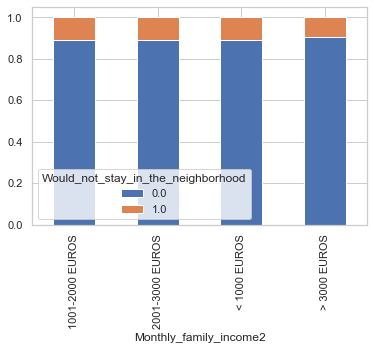

In [126]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

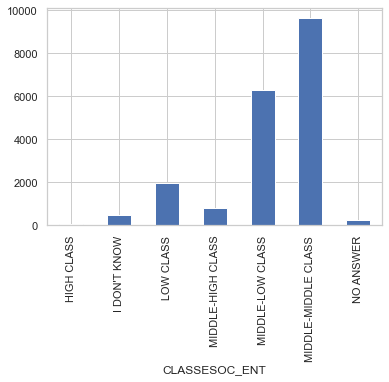

In [127]:
# COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
survey_65.groupby(['CLASSESOC_ENT']).size().plot.bar()

In [128]:
display(pd.crosstab(data.CLASSESOC_ENT, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,60,3
I DON'T KNOW,388,31
LOW CLASS,1416,239
MIDDLE-HIGH CLASS,685,66
MIDDLE-LOW CLASS,4749,665
MIDDLE-MIDDLE CLASS,7709,792
NO ANSWER,177,22


In [129]:
data.CLASSESOC_ENT.unique()

array(['MIDDLE-LOW CLASS', 'MIDDLE-MIDDLE CLASS', 'LOW CLASS',
       "I DON'T KNOW", 'NO ANSWER', 'HIGH CLASS', 'MIDDLE-HIGH CLASS'],
      dtype=object)

In [130]:
data_prep = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, #'MIDDLE-MIDDLE', # inserting most common value
             'HIGH CLASS': 'HIGH'} 
data['Social_class'] = [data_prep[i] for i in data['CLASSESOC_ENT']]

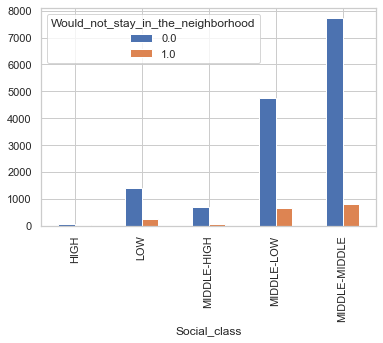

In [131]:
table = pd.crosstab(data.Social_class, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

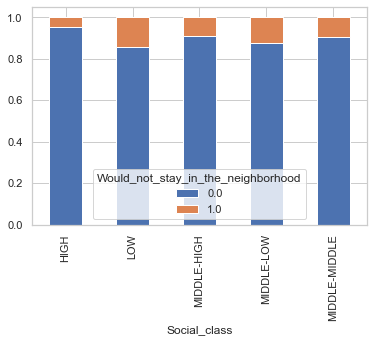

In [132]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [133]:
# Replacing "I DON'T KNOW" answet with the most common response 'MIDDLE-MIDDLE'
data_prep2 = {'MIDDLE-HIGH CLASS': 'MIDDLE-HIGH', 
             'MIDDLE-MIDDLE CLASS': 'MIDDLE-MIDDLE', 
             'MIDDLE-LOW CLASS': 'MIDDLE-LOW',
             "I DON'T KNOW": 'MIDDLE-MIDDLE', # inserting most common value
             'LOW CLASS': 'LOW', 
             'NO ANSWER': np.nan, 
             'HIGH CLASS': 'HIGH'} 
data['Social_class2'] = [data_prep2[i] for i in data['CLASSESOC_ENT']]

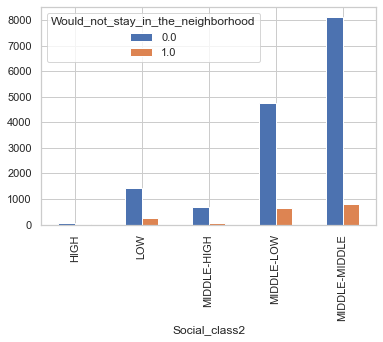

In [134]:
table = pd.crosstab(data.Social_class2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

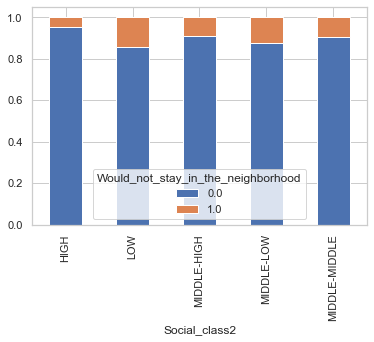

In [135]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

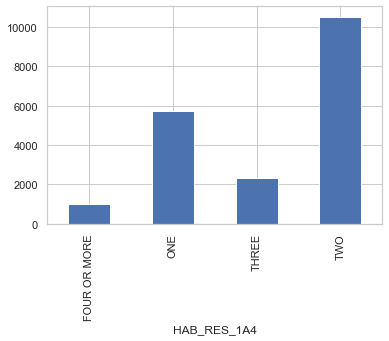

In [136]:
# WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
survey_65.groupby(['HAB_RES_1A4']).size().plot.bar()

In [137]:
display(pd.crosstab(data.HAB_RES_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,726,88
ONE,4546,558
THREE,1773,194
TWO,8139,978


In [138]:
data.HAB_RES_1A4.unique()

array(['TWO', 'ONE', 'THREE', 'FOUR OR MORE'], dtype=object)

In [139]:
data_prep = {'ONE': 1, 
             'TWO': 0, 
             'THREE': 0, 
             'FOUR OR MORE': 0} 
data['Living_alone'] = [data_prep[i] for i in data['HAB_RES_1A4']]

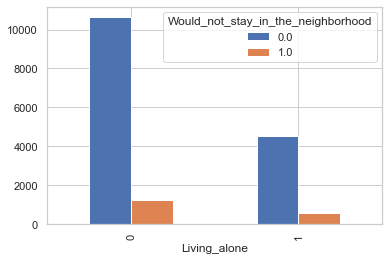

In [140]:
table = pd.crosstab(data.Living_alone, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

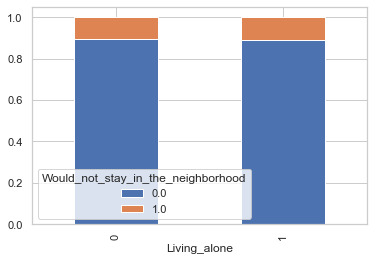

In [141]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.4.3 Feature engineering

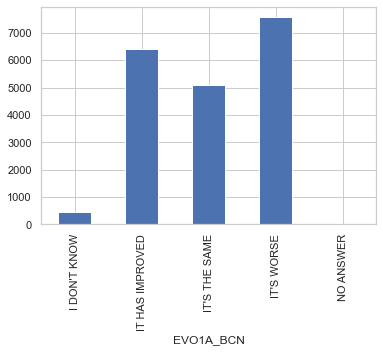

In [142]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
survey_65.groupby(['EVO1A_BCN']).size().plot.bar()

In [143]:
display(pd.crosstab(data.EVO1A_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,357,33
IT HAS IMPROVED,5279,503
IT'S THE SAME,4120,416
IT'S WORSE,5419,865
NO ANSWER,9,1


In [144]:
data.EVO1A_BCN.unique()

array(['IT HAS IMPROVED', "IT'S THE SAME", "IT'S WORSE", "I DON'T KNOW",
       'NO ANSWER'], dtype=object)

In [145]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data['EVO1A_BCN']]

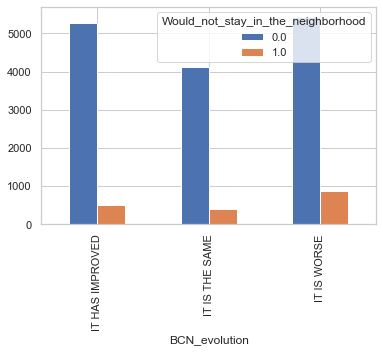

In [146]:
table = pd.crosstab(data.BCN_evolution, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

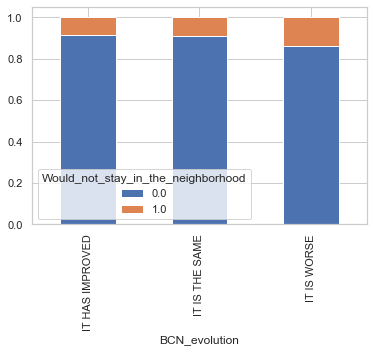

In [147]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [148]:
data_prep2 = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['BCN_evolution2'] = [data_prep2[i] for i in data['EVO1A_BCN']]

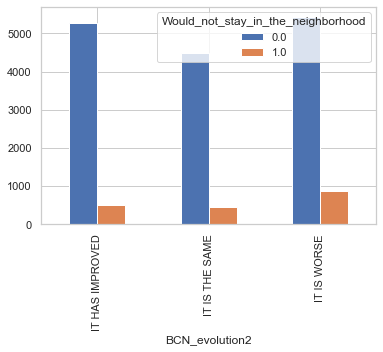

In [149]:
table = pd.crosstab(data.BCN_evolution2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

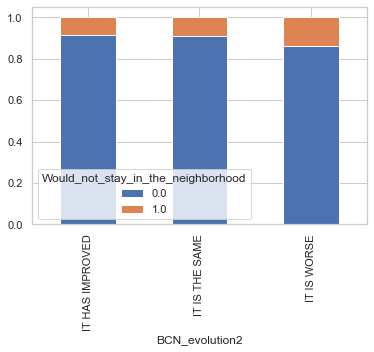

In [150]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

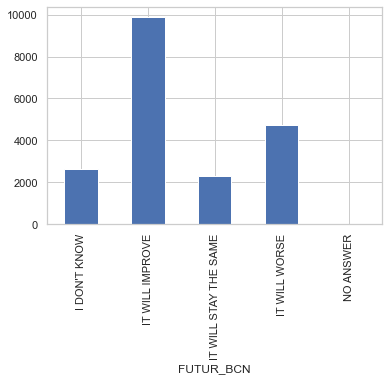

In [151]:
# FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
survey_65.groupby(['FUTUR_BCN']).size().plot.bar()

In [152]:
display(pd.crosstab(data.FUTUR_BCN, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1987,244
IT WILL IMPROVE,8009,819
IT WILL STAY THE SAME,1795,221
IT WILL WORSE,3382,532
NO ANSWER,11,2


In [153]:
data.FUTUR_BCN.unique()

array(['IT WILL IMPROVE', 'IT WILL WORSE', "I DON'T KNOW",
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [154]:
data_prep = {'IT WILL WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": np.nan, 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data['FUTUR_BCN']]

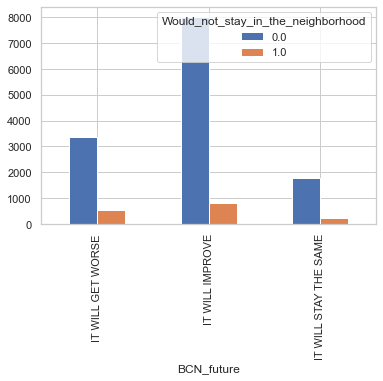

In [155]:
table = pd.crosstab(data.BCN_future, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

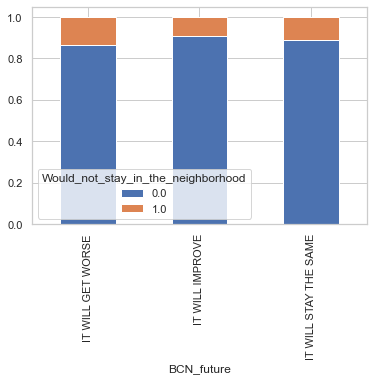

In [156]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [157]:
data_prep2 = {'IT WILL WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['BCN_future2'] = [data_prep2[i] for i in data['FUTUR_BCN']]

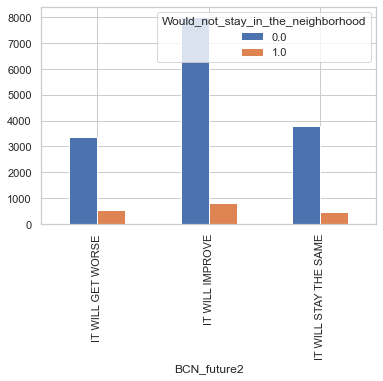

In [158]:
table = pd.crosstab(data.BCN_future2, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

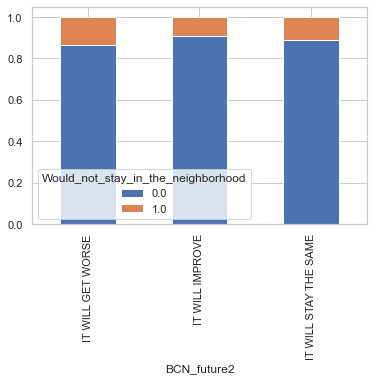

In [159]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

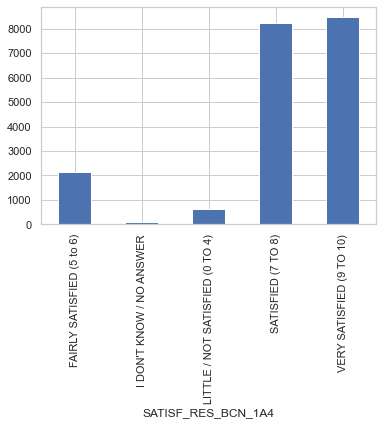

In [160]:
# ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA? - GROUPED
survey_65.groupby(['SATISF_RES_BCN_1A4']).size().plot.bar()

In [161]:
display(pd.crosstab(data.SATISF_RES_BCN_1A4, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
SATISF_RES_BCN_1A4,,
FAIRLY SATISFIED (5 to 6),1351,259
I DON'T KNOW / NO ANSWER,79,15
LITTLE / NOT SATISFIED (0 TO 4),280,73
SATISFIED (7 TO 8),6396,785
VERY SATISFIED (9 TO 10),7078,686


In [162]:
data.SATISF_RES_BCN_1A4.unique()

array(['SATISFIED (7 TO 8)', 'FAIRLY SATISFIED (5 to 6)',
       'VERY SATISFIED (9 TO 10)', 'LITTLE / NOT SATISFIED (0 TO 4)',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [163]:
data_prep = {'SATISFIED (7 TO 8)': 'SATISFIED', 
             'VERY SATISFIED (9 TO 10)': 'SATISFIED',
             'FAIRLY SATISFIED (5 to 6)': 'NOT SATISFIED', 
             'LITTLE / NOT SATISFIED (0 TO 4)': 'NOT SATISFIED',
             "I DON'T KNOW / NO ANSWER": np.nan}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data['SATISF_RES_BCN_1A4']]

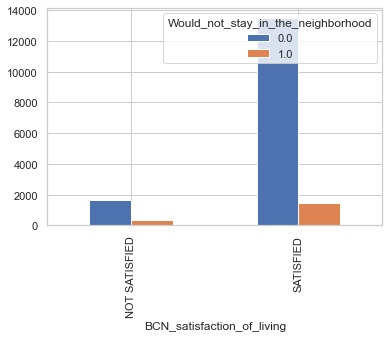

In [164]:
table = pd.crosstab(data.BCN_satisfaction_of_living, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

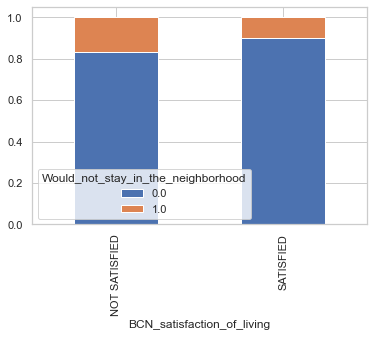

In [165]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

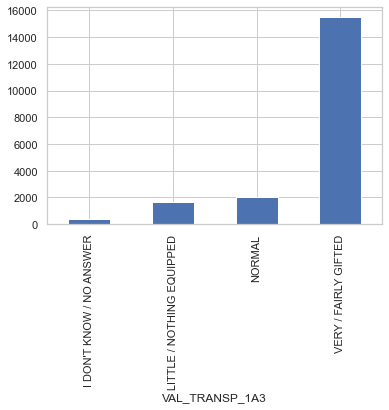

In [166]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY? - GROUPED
survey_65.groupby(['VAL_TRANSP_1A3']).size().plot.bar()

In [167]:
display(pd.crosstab(data.VAL_TRANSP_1A3, data.Would_not_stay_in_the_neighborhood))

Would_not_stay_in_the_neighborhood,0.0,1.0
VAL_TRANSP_1A3,,
I DON'T KNOW / NO ANSWER,297,38
LITTLE / NOTHING EQUIPPED,1152,193
NORMAL,1555,203
VERY / FAIRLY GIFTED,12180,1384


In [168]:
data.VAL_TRANSP_1A3.unique()

array(['VERY / FAIRLY GIFTED', 'NORMAL', 'LITTLE / NOTHING EQUIPPED',
       "I DON'T KNOW / NO ANSWER"], dtype=object)

In [169]:
data_prep = {'VERY / FAIRLY GIFTED': "GOOD", 
             'NORMAL': "NORMAL", 
             'LITTLE / NOTHING EQUIPPED': "BAD",
             "I DON'T KNOW / NO ANSWER": np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A3']]

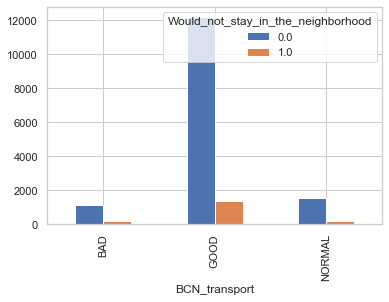

In [170]:
table = pd.crosstab(data.BCN_transport, data.Would_not_stay_in_the_neighborhood)
table.plot(kind='bar')

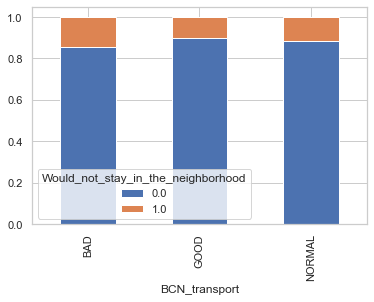

In [171]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [172]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT IS THE SAME' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [173]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL STAY THE SAME' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [174]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction_of_living'] = new_column

In [175]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NORMAL":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NORMAL' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [176]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution2'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution2'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution2'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution2'] == "IT IS THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution2'] == 'IT IS THE SAME' and data.iloc[j]['Barri_evolution2'] == "IT IS WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution2'] = new_column

In [177]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future2'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future2'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future2'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future2'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    elif data.iloc[j]['BCN_future2'] == 'IT WILL STAY THE SAME' and data.iloc[j]['Barri_future2'] == "IT WILL GET WORSE":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future2'] = new_column

# 1.5 Final dataset

In [178]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,BCN_future,BCN_future2,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_evolution2,BCN_over_barri_future2
57801,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,I HAVE ALWAYS LIVED IN THE BARRI,IT HAS IMPROVED,...,IT WILL IMPROVE,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0,0,0
57810,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,...,IT WILL IMPROVE,IT WILL IMPROVE,NOT SATISFIED,GOOD,0,0,0,1,0,0
57811,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,...,IT WILL IMPROVE,IT WILL IMPROVE,NOT SATISFIED,GOOD,1,0,0,1,1,0
57817,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT'S THE SAME,...,IT WILL IMPROVE,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0,0,0
57819,2007,CIUTAT VELLA,EL RAVAL,EL RAVAL,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S THE SAME,...,IT WILL IMPROVE,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0,0,0


In [179]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_1A4',
 'VAL_GESTMUNI_1A2',
 'VAL_ESCOMBRARIES_1A2',
 'VAL_NETEJA_1A2',
 'VAL_VERD_1A2',
 'VAL_ENLLUM_1A2',
 'VAL_URBA_1A2',
 'VAL_ASFALT_1A2',
 'VAL_FACANES_1A2',
 'VAL_CIRCUL_1A2',
 'VAL_APARCA_1A2',
 'VAL_BUS_1A2',
 'VAL_METRO_1A2',
 'VAL_GUB_1A2',
 'VAL_SEGUR_1A2',
 'VAL_SEGUR_BARRI_1A2',
 'VAL_ESPORT_1A2',
 'VAL_SIAC_1A2',
 'VAL_CSS_1A2',
 'VAL_CULT_1A2',
 'VAL_FESTESPOP_1A2',
 'VAL_MERCAT_1A2',
 'VAL_BIBLIO_1A2',
 'TRANSP_MOU',
 'VAL_TRANSP_1A3',
 'VAL_TRANSP_BARRI_1A3',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_1A4',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI_1A2',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4',
 'Would_not_stay_in_the_neighborhood',


In [181]:
survey_transformed = data[['ANY', 'NOM_DISTRICTE', 
                           'Would_not_stay_in_the_neighborhood', 'Gender', 'Time_living_in_barri', 
                           'Barri_evolution', 'Barri_future', 'Barri_satisfaction_of_living', 'Barri_comparison',
                           'GARBAGE COLLECTION', 'STREETS CLEANING', 'GREEN AREAS', 'PUBLIC LIGHTING',
                           'ASPHALT AND STREET CONSERVATION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 
                           'BUS', 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
                           'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'MUNICIPAL MARKETS',
                           'Barri_transport', 'Owns_a_car', 'House_size', 'Monthly_family_income', 'Social_class',
                           'Living_alone', 'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport',
                           'BCN_over_barri_evolution', 'BCN_over_barri_future', 'BCN_over_barri_satisfaction_of_living',
                           'BCN_over_barri_transport']]

In [182]:
survey_transformed.reset_index(drop=True, inplace=True)

In [183]:
survey_transformed.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
1,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,0,IT HAS IMPROVED,IT WILL IMPROVE,NOT SATISFIED,GOOD,0,0,0,1
2,2007,CIUTAT VELLA,1.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL IMPROVE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,NOT SATISFIED,GOOD,1,0,0,1
3,2007,CIUTAT VELLA,1.0,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
4,2007,CIUTAT VELLA,1.0,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,0,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0


In [184]:
survey_transformed.shape

(19582, 34)

In [185]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
survey_transformed.shape

(6914, 34)

In [187]:
survey_transformed.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    6137
1.0     777
dtype: int64

In [188]:
survey_transformed.groupby(['NOM_DISTRICTE']).size()

NOM_DISTRICTE
CIUTAT VELLA              531
EIXAMPLE                 1181
GRÀCIA                    557
HORTA - GUINARDÓ          783
LES CORTS                 516
NOU BARRIS                789
SANT ANDREU               560
SANT MARTÍ                837
SANTS - MONTJUÏC          698
SARRIÀ - SANT GERVASI     462
dtype: int64

In [189]:
survey_transformed.groupby(['Gender']).size()

Gender
0    3051
1    3863
dtype: int64

In [190]:
survey_transformed.to_pickle("survey_transformed.pkl")

In [193]:
survey_transformed2 = data[['ANY', 'NOM_DISTRICTE', 
                           'Would_not_stay_in_the_neighborhood', 'Gender', 'Time_living_in_barri', 
                           'Barri_evolution2', 'Barri_future2', 'Barri_satisfaction_of_living', 'Barri_comparison2',
                           'GARBAGE COLLECTION', 'STREETS CLEANING', 'GREEN AREAS', 'PUBLIC LIGHTING',
                           'ASPHALT AND STREET CONSERVATION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 
                           'BUS', 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
                           'CITIZEN SECURITY IN THE NEIGHBORHOOD', 'MUNICIPAL MARKETS',
                           'Barri_transport', 'Owns_a_car', 'House_size2', 'Monthly_family_income2', 'Social_class2',
                           'Living_alone', 'BCN_evolution2', 'BCN_future2', 'BCN_satisfaction_of_living', 'BCN_transport',
                           'BCN_over_barri_evolution2', 'BCN_over_barri_future2', 'BCN_over_barri_satisfaction_of_living',
                           'BCN_over_barri_transport']]

In [194]:
survey_transformed2.reset_index(drop=True, inplace=True)

In [195]:
survey_transformed2.shape

(19582, 34)

In [196]:
survey_transformed2.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
survey_transformed2.shape

(9642, 34)

In [198]:
survey_transformed2.to_pickle("survey_transformed2.pkl")